In [1]:
import lipinet.databases  # Import the module
import graph_tool as gt
import importlib

# Reload the module to ensure changes are picked up
importlib.reload(lipinet)

# Now you can use your function after reloading the module
from lipinet.databases import download_and_load_data, get_prior_knowledge
from lipinet.network import MultilayerNetwork
from lipinet.visualisation import set_node_sizes_and_text_by_depth

import pandas as pd

import graph_tool
from graph_tool.all import graph_draw, bfs_iterator

In [2]:
# edges_data[:2]

In [3]:
# edges_data[2:]

In [4]:
# layer_edges_data

In [5]:
import pandas as pd

# Initialize the MultilayerNetwork
network = MultilayerNetwork()

# Define data for each layer according to the build_layer format
# Layer 1: ChEBI compounds
layer1_data = [
    ('CHEBI:12345', 'Compound'),
    ('CHEBI:54321', 'Compound'),
    ('CHEBI:67890', 'Compound')
]
layer1_custom_properties = {
    'CHEBI:12345': {'extra_info': 'Basic Compound'},
    'CHEBI:54321': {'extra_info': 'Special Compound'}
}

# Layer 2: ChEBI compound variants or other subset
layer2_data = [
    ('CHEBI:12345_variant', 'Compound Variant'),
    ('CHEBI:54321_variant', 'Compound Variant'),
    ('CHEBI:11111', 'Compound')
]
layer2_custom_properties = {
    'CHEBI:12345_variant': {'extra_info': 'Variant of CHEBI:12345'},
    'CHEBI:54321_variant': {'extra_info': 'Variant of CHEBI:54321'}
}

# Layer 3: Rhea reactions
layer3_data = [
    ('RHEA:10000', 'Reaction'),
    ('RHEA:20000', 'Reaction'),
    ('RHEA:30000', 'Reaction')
]
layer3_custom_properties = {
    'RHEA:10000': {'reaction_type': 'synthesis'},
    'RHEA:20000': {'reaction_type': 'degradation'}
}

# Build each layer using build_layer
network.build_layer(layer1_data, "Layer1", "ChEBI", custom_properties=layer1_custom_properties)
network.build_layer(layer2_data, "Layer2", "ChEBI", custom_properties=layer2_custom_properties)
network.build_layer(layer3_data, "Layer3", "Rhea", custom_properties=layer3_custom_properties)

# Define edges between nodes across layers directly
edges_data = [
    ('CHEBI:12345', 'CHEBI:12345_variant', 'variant', 1.0),
    ('CHEBI:54321', 'CHEBI:54321_variant', 'variant', 1.0),
    ('RHEA:10000', 'CHEBI:12345', 'reaction-participant', 2.0),
    ('RHEA:20000', 'CHEBI:67890', 'reaction-participant', 2.5),
    ('RHEA:30000', 'CHEBI:54321', 'reaction-participant', 2.0)
]

layer_edges_data = edges_data[:2]
# Add edges using add_edges_from_nodes method
print([item[2] for item in layer_edges_data])
    
network.add_edges_from_nodes(from_nodes=[item[0] for item in layer_edges_data],
                             to_nodes=[item[1] for item in layer_edges_data],
                             from_layer='Layer1',
                             to_layer='Layer2', #,
                             edge_properties= {'edge_layertype':'interlayer', #variant
                                               'edge_weight':1}
                             #edge_properties= {'edge_type':[item[2] for item in layer_edges_data], 
                             #                  'edge_weight':[item[3] for item in layer_edges_data]}
                             )
layer_edges_data = edges_data[2:]
# Add edges using add_edges_from_nodes method
network.add_edges_from_nodes(from_nodes=[item[0] for item in layer_edges_data],
                             to_nodes=[item[1] for item in layer_edges_data],
                             from_layer='Layer3',
                             to_layer='Layer1', #,
                             edge_properties= {'edge_layertype':'interlayer', #reaction-participant
                                               'edge_weight':2}
                             #edge_properties= {'edge_type':[item[2] for item in layer_edges_data], 
                             #                  'edge_weight':[item[3] for item in layer_edges_data]}
                            )
# for source, target, edge_type, edge_weight in edges_data:
#     network.add_edges_from_nodes(source, target, from_layer='Layer1', to_layer='Layer2', edge_properties= {'edge_type':edge_type, 'edge_weight':edge_weight})

# Print the edges for verification
print("Edges in the network:")
for edge in network.graph.edges():
    source = network.graph.vertex_index[edge.source()]
    target = network.graph.vertex_index[edge.target()]
    edge_type = network.edge_layertype[edge]
    edge_weight = network.edge_weight[edge]
    print(f"Edge from {source} to {target}) - Type: {edge_type}, Weight: {edge_weight}")

# Print nodes by layer to verify properties
print("\nNodes in each layer:")
for node_id, vertex in network.node_map.items():
    print(f"Node {node_id}: Layer = {network.layer[vertex]}, Authority = {network.authority[vertex]}, Node LayerType = {network.node_type[vertex]}")

Node CHEBI:12345: layer=Layer1, authority=ChEBI, node_type=Compound, extra props=dict_items([('extra_info', 'Basic Compound')])
Node CHEBI:54321: layer=Layer1, authority=ChEBI, node_type=Compound, extra props=dict_items([('extra_info', 'Special Compound')])
Node CHEBI:67890: layer=Layer1, authority=ChEBI, node_type=Compound, extra props=dict_items([])
Node CHEBI:12345_variant: layer=Layer2, authority=ChEBI, node_type=Compound Variant, extra props=dict_items([('extra_info', 'Variant of CHEBI:12345')])
Node CHEBI:54321_variant: layer=Layer2, authority=ChEBI, node_type=Compound Variant, extra props=dict_items([('extra_info', 'Variant of CHEBI:54321')])
Node CHEBI:11111: layer=Layer2, authority=ChEBI, node_type=Compound, extra props=dict_items([])
Node RHEA:10000: layer=Layer3, authority=Rhea, node_type=Reaction, extra props=dict_items([('reaction_type', 'synthesis')])
Node RHEA:20000: layer=Layer3, authority=Rhea, node_type=Reaction, extra props=dict_items([('reaction_type', 'degradation'

	•	Layer1: Red (1, 0, 0, 1) — RGB: (255, 0, 0)
	•	Layer2: Green (0, 1, 0, 1) — RGB: (0, 255, 0)
	•	Layer3: Blue (0, 0, 1, 1) — RGB: (0, 0, 255)

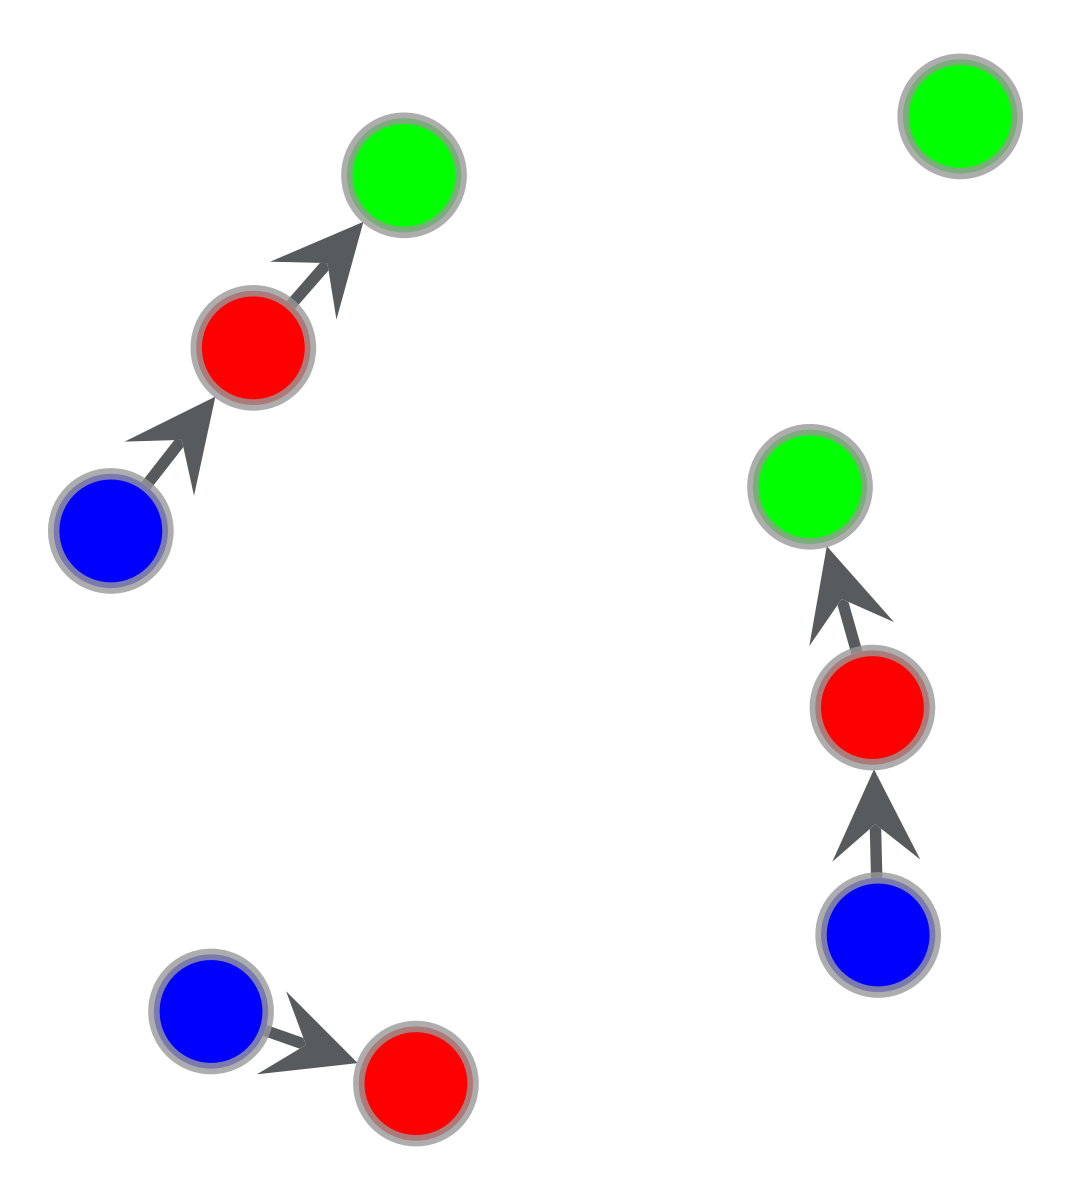

In [6]:
from graph_tool.draw import graph_draw, prop_to_size
from matplotlib import pyplot as plt

# Map layers to colors
color_map = {'Layer1': (1, 0, 0, 1), 'Layer2': (0, 1, 0, 1), 'Layer3': (0, 0, 1, 1)}
layer_color = network.graph.new_vertex_property("vector<double>")
for v in network.graph.vertices():
    layer_color[v] = color_map[network.layer[v]]

# Draw the graph with vertices colored by layer
graph_draw(network.graph, vertex_fill_color=layer_color)
plt.show()

In [7]:
network.graph.edge_properties

{'weight': <EdgePropertyMap object with value type 'double', for Graph 0x14d21d280, at 0x16be3f950>, 'edge_layertype': <EdgePropertyMap object with value type 'string', for Graph 0x14d21d280, at 0x16be79400>, 'edge_properties': <EdgePropertyMap object with value type 'python::object', for Graph 0x14d21d280, at 0x16be79730>}

Now try again, using our new functionality...

In [8]:
import pandas as pd

# Initialize the MultilayerNetwork
network = MultilayerNetwork()

# Define data for each layer according to the build_layer format
# Layer 1: ChEBI compounds
layer1_data = [
    ('CHEBI:12345', 'Compound'),
    ('CHEBI:54321', 'Compound'),
    ('CHEBI:67890', 'Compound')
]
layer1_custom_properties = {
    'CHEBI:12345': {'extra_info': 'Basic Compound'},
    'CHEBI:54321': {'extra_info': 'Special Compound'}
}

# Layer 2: ChEBI compound variants or other subset
layer2_data = [
    ('CHEBI:12345_variant', 'Compound Variant'),
    ('CHEBI:54321_variant', 'Compound Variant'),
    ('CHEBI:11111', 'Compound')
]
layer2_custom_properties = {
    'CHEBI:12345_variant': {'extra_info': 'Variant of CHEBI:12345'},
    'CHEBI:54321_variant': {'extra_info': 'Variant of CHEBI:54321'}
}

# Layer 3: Rhea reactions
layer3_data = [
    ('RHEA:10000', 'Reaction'),
    ('RHEA:20000', 'Reaction'),
    ('RHEA:30000', 'Reaction')
]
layer3_custom_properties = {
    'RHEA:10000': {'reaction_type': 'synthesis'},
    'RHEA:20000': {'reaction_type': 'degradation'}
}

# Build each layer using build_layer
network.build_layer(layer1_data, "Layer1", "ChEBI", custom_properties=layer1_custom_properties)
network.build_layer(layer2_data, "Layer2", "ChEBI", custom_properties=layer2_custom_properties)
network.build_layer(layer3_data, "Layer3", "Rhea", custom_properties=layer3_custom_properties)

# Define edges between nodes across layers directly
edges_data = [
    ('CHEBI:12345', 'CHEBI:12345_variant', 'variant', 1.0),
    ('CHEBI:54321', 'CHEBI:54321_variant', 'variant', 1.0),
    ('RHEA:10000', 'CHEBI:12345', 'reaction-participant', 2.0),
    ('RHEA:20000', 'CHEBI:67890', 'reaction-participant', 2.5),
    ('RHEA:30000', 'CHEBI:54321', 'reaction-participant', 2.0)
]

layer_edges_data = edges_data[:2]
# Add edges using add_edges_from_nodes method
print([item[2] for item in layer_edges_data])
    
network.add_edges_from_nodes(from_nodes=[item[0] for item in layer_edges_data],
                             to_nodes=[item[1] for item in layer_edges_data],
                             from_layer='Layer1',
                             to_layer='Layer2', #,
                            #  edge_properties= {'edge_layertype':'interlayer', #variant
                            #                    'edge_weight':1}
                             edge_properties= {'edge_layertype':[item[2] for item in layer_edges_data], 
                                              'edge_weight':[item[3] for item in layer_edges_data]}
                             )
layer_edges_data = edges_data[2:]
# Add edges using add_edges_from_nodes method
network.add_edges_from_nodes(from_nodes=[item[0] for item in layer_edges_data],
                             to_nodes=[item[1] for item in layer_edges_data],
                             from_layer='Layer3',
                             to_layer='Layer1', #,
                            #  edge_properties= {'edge_layertype':'interlayer', #reaction-participant
                            #                    'edge_weight':2}
                             edge_properties= {'edge_layertype':[item[2] for item in layer_edges_data], 
                                              'edge_weight':[item[3] for item in layer_edges_data]}
                            )
# for source, target, edge_type, edge_weight in edges_data:
#     network.add_edges_from_nodes(source, target, from_layer='Layer1', to_layer='Layer2', edge_properties= {'edge_type':edge_type, 'edge_weight':edge_weight})

# Print the edges for verification
print("Edges in the network:")
for edge in network.graph.edges():
    source = network.graph.vertex_index[edge.source()]
    target = network.graph.vertex_index[edge.target()]
    edge_type = network.edge_layertype[edge]
    edge_weight = network.edge_weight[edge]
    print(f"Edge from {source} to {target}) - Type: {edge_type}, Weight: {edge_weight}")

# Print nodes by layer to verify properties
print("\nNodes in each layer:")
for node_id, vertex in network.node_map.items():
    print(f"Node {node_id}: Layer = {network.layer[vertex]}, Authority = {network.authority[vertex]}, Node LayerType = {network.node_type[vertex]}")

Node CHEBI:12345: layer=Layer1, authority=ChEBI, node_type=Compound, extra props=dict_items([('extra_info', 'Basic Compound')])
Node CHEBI:54321: layer=Layer1, authority=ChEBI, node_type=Compound, extra props=dict_items([('extra_info', 'Special Compound')])
Node CHEBI:67890: layer=Layer1, authority=ChEBI, node_type=Compound, extra props=dict_items([])
Node CHEBI:12345_variant: layer=Layer2, authority=ChEBI, node_type=Compound Variant, extra props=dict_items([('extra_info', 'Variant of CHEBI:12345')])
Node CHEBI:54321_variant: layer=Layer2, authority=ChEBI, node_type=Compound Variant, extra props=dict_items([('extra_info', 'Variant of CHEBI:54321')])
Node CHEBI:11111: layer=Layer2, authority=ChEBI, node_type=Compound, extra props=dict_items([])
Node RHEA:10000: layer=Layer3, authority=Rhea, node_type=Reaction, extra props=dict_items([('reaction_type', 'synthesis')])
Node RHEA:20000: layer=Layer3, authority=Rhea, node_type=Reaction, extra props=dict_items([('reaction_type', 'degradation'

In [9]:
# Create the DataFrame
df_edges = pd.DataFrame({
    'from_node': ['A', 'C', 'E'],
    'to_node': ['B', 'D', 'F'],
    'from_layer': ['layer1', 'layer1', 'layer1'],
    'to_layer': ['layer2', 'layer2', 'layer2'],
    'edge_type': ['activation', 'inhibition', 'modulation'],
    'edge_weight': [1.0, 0.5, 0.75]
})

# Call add_edges_from_dataframe
network.add_edges_from_dataframe(
    df_edges,
    from_col='from_node',
    to_col='to_node',
    from_layer='layer1',  # Optional, would override df 'from_layer' if set here
    to_layer='layer2',    # Optional, would override df 'to_layer' if set here
    edge_type=df_edges['edge_type'].tolist(),
    edge_weight=df_edges['edge_weight'].tolist()
)

Node ('layer1', 'A') not found. Creating node.
Node ('layer2', 'B') not found. Creating node.
Edge added from 9 to 10 with properties: {'edge_type': 'activation', 'edge_weight': 1.0}
Node ('layer1', 'C') not found. Creating node.
Node ('layer2', 'D') not found. Creating node.
Edge added from 11 to 12 with properties: {'edge_type': 'inhibition', 'edge_weight': 0.5}
Node ('layer1', 'E') not found. Creating node.
Node ('layer2', 'F') not found. Creating node.
Edge added from 13 to 14 with properties: {'edge_type': 'modulation', 'edge_weight': 0.75}


In [15]:
# Create a DataFrame with three rows
df_edges = pd.DataFrame({
    'from_node': ['A', 'C', 'E'],
    'to_node': ['B', 'D', 'F'],
    'from_layer': ['layer1', 'layer1', 'layer1'],
    'to_layer': ['layer2', 'layer2', 'layer2'],
    'edge_type': ['activation', 'inhibition', 'modulation'],
    'edge_weight': [1.0, 0.5, 0.75]
})
df_edges

,from_node,to_node,from_layer,to_layer,edge_type,edge_weight
0,A,B,layer1,layer2,activation,1.00
1,C,D,layer1,layer2,inhibition,0.50
2,E,F,layer1,layer2,modulation,0.75


Example of deliberate failure:

In [14]:
# Attempt to call add_edges_from_dataframe with mismatched edge_properties list lengths
network.add_edges_from_dataframe(
    df_edges,
    from_col='from_node',
    to_col='to_node',
    from_layer='layer1',
    to_layer='layer2',
    edge_type=['activation', 'inhibition'],  # Incorrect length (only 2 items, but we have 3 edges)
    edge_weight=[1.0, 0.5, 0.75]  # Correct length (3 items)
)

ValueError: Length of property list 'edge_type' (2) does not match the expected number of edges (3).

### TODO

we should modify the add_edges_from_nodes function, or add a new one, to take a df. this would be much easier to tailor the layers and edge properties of what we are adding...

In [10]:
network.graph.vertex_properties

{'layer': <VertexPropertyMap object with value type 'string', for Graph 0x16becd280, at 0x16becd2b0>, 'authority': <VertexPropertyMap object with value type 'string', for Graph 0x16becd280, at 0x16becd430>, 'node_type': <VertexPropertyMap object with value type 'string', for Graph 0x16becd280, at 0x16becd460>, 'node_id': <VertexPropertyMap object with value type 'string', for Graph 0x16becd280, at 0x16becd490>, 'extra_info': <VertexPropertyMap object with value type 'string', for Graph 0x16becd280, at 0x1064c4ce0>, 'reaction_type': <VertexPropertyMap object with value type 'string', for Graph 0x16becd280, at 0x16b2a8b30>}

In [11]:
def word(x):
    for item in x:
        print(x)
        if item=='Layer1':
            return 'Green'
        else:
            return 'Red'

In [12]:
word(network.graph.vp['layer'])

<VertexPropertyMap object with value type 'string', for Graph 0x16becd280, at 0x16becd2b0>


'Green'

In [13]:
graph_draw(network.graph, vertex_color=network.graph.vp['layer'])

ValueError: Invalid RGBA argument: 'Layer1'

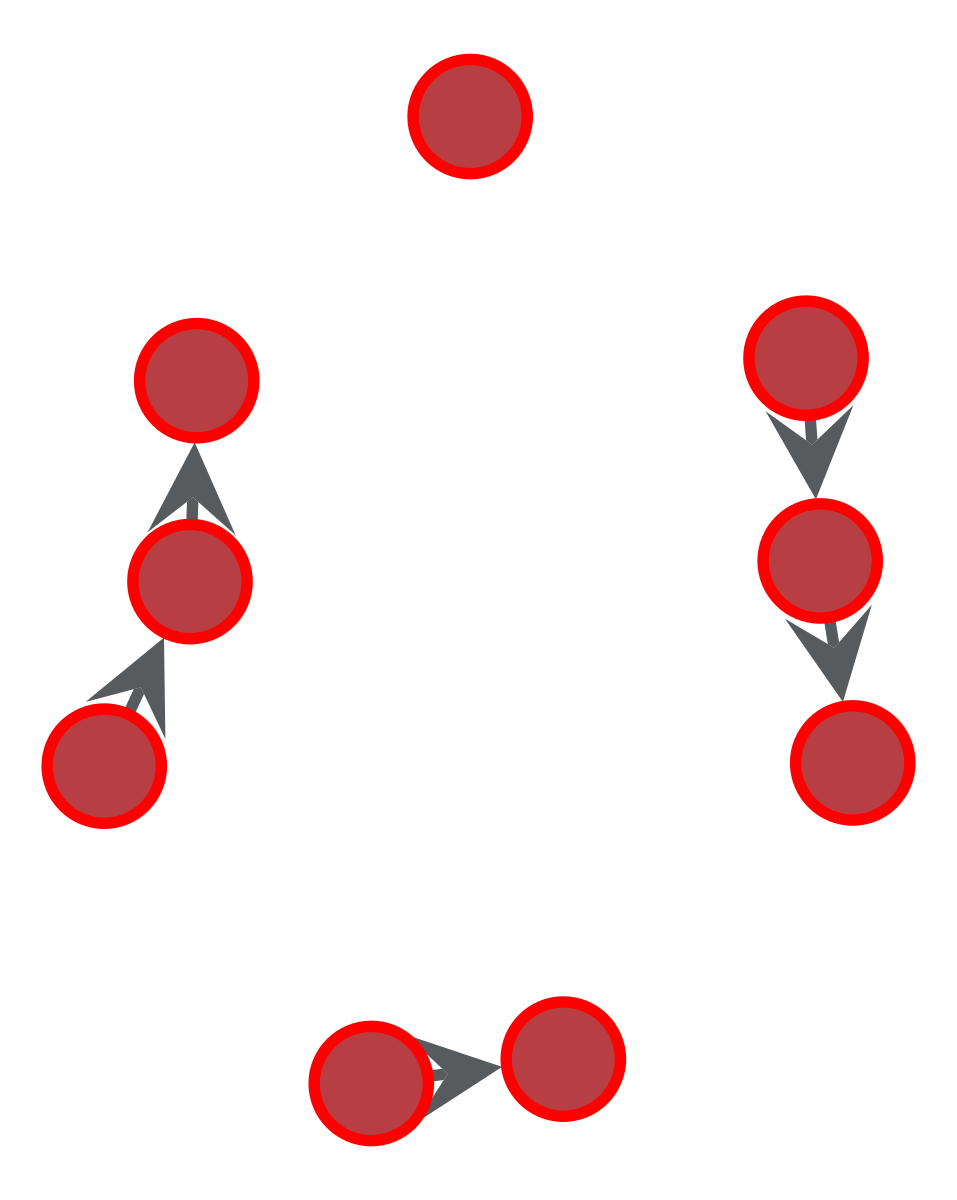

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x166a1bb60, at 0x166a142c0>

In [22]:
graph_draw(network.graph, vertex_color='red')